## Data Inspection

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset
df = pd.read_csv("../raw_data.csv")

In [3]:
# Inspect dataset
df.shape

(26147, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26147 entries, 0 to 26146
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zip_code             26147 non-null  int64  
 1   commune              26147 non-null  object 
 2   province             26147 non-null  object 
 3   type_of_property     26147 non-null  int64  
 4   subtype_of_property  26147 non-null  object 
 5   price                26111 non-null  float64
 6   building_condition   19457 non-null  object 
 7   facade_number        16785 non-null  float64
 8   living_area          26147 non-null  int64  
 9   equipped_kitchen     26147 non-null  object 
 10  bedroom_nr           26147 non-null  int64  
 11  swimming_pool        26147 non-null  int64  
 12  furnished            26147 non-null  int64  
 13  open_fire            26147 non-null  int64  
 14  terrace              26147 non-null  int64  
 15  garden               26147 non-null 

In [5]:
df.value_counts("zip_code")

zip_code
8300    918
1000    626
1070    564
9000    564
1180    548
       ... 
7024      1
7033      1
7034      1
4287      1
9970      1
Name: count, Length: 875, dtype: int64

In [6]:
df.value_counts("commune")

commune
Westkapelle     918
Antwerpen       692
Bruxelles       626
Gent            564
Anderlecht      564
               ... 
Bilstain          1
Binkom            1
Basse-Bodeux      1
Baulers           1
Zillebeke         1
Name: count, Length: 849, dtype: int64

In [7]:
df.value_counts("province")

province
Bruxelles          5127
West-Vlaanderen    4964
Oost-Vlaanderen    4364
Antwerpen          3194
Hainaut            2157
Liège              2147
Vlaams Brabant     1796
Brabant Wallon      980
Luxembourg          938
Limburg             480
Name: count, dtype: int64

In [8]:
df.value_counts("garden")

garden
0        20949
100        138
1          111
200        101
50          99
         ...  
634          1
11500        1
6900         1
6996         1
7600         1
Name: count, Length: 948, dtype: int64

In [9]:
df.value_counts("bedroom_nr")

bedroom_nr
2     9304
3     7974
1     3251
4     2973
5     1025
0      890
6      427
7      143
8       76
9       26
10      18
16       9
12       8
13       8
11       6
20       3
24       2
15       1
14       1
18       1
25       1
Name: count, dtype: int64

In [10]:
df.value_counts("building_condition")

building_condition
good              8229
as new            7061
to renovate       1577
to be done up     1376
just renovated    1148
to restore          66
Name: count, dtype: int64

In [11]:
df.value_counts("plot_surface")

plot_surface
0        16290
200         74
120         66
150         58
250         56
         ...  
23159        1
23290        1
23503        1
23912        1
24091        1
Name: count, Length: 2192, dtype: int64

In [12]:
df.describe()

,zip_code,type_of_property,price,facade_number,living_area,bedroom_nr,swimming_pool,furnished,open_fire,terrace,garden,plot_surface
count,26147.000000,26147.000000,2.611100e+04,16785.000000,26147.000000,26147.000000,26147.000000,26147.000000,26147.000000,26147.000000,26147.000000,26147.000000
mean,5085.507821,0.394080,4.594943e+05,2.720167,143.557425,2.599648,0.019429,0.032088,0.007458,12.193942,102.666692,407.083681
std,3283.479987,0.488661,4.355173e+05,0.847971,97.351713,1.370721,0.138029,0.176237,0.086038,43.316550,676.906691,2650.878092
min,1000.000000,0.000000,2.750000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1743.500000,0.000000,2.650000e+05,2.000000,88.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4480.000000,0.000000,3.500000e+05,2.000000,116.000000,2.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
75%,8460.000000,1.000000,4.921000e+05,3.000000,170.000000,3.000000,0.000000,0.000000,0.000000,15.000000,0.000000,255.000000
max,9992.000000,1.000000,8.900000e+06,15.000000,992.000000,25.000000,1.000000,1.000000,1.000000,3749.000000,50000.000000,160737.000000


## Data Cleaning

### Notes on missing values and zero values:

**Missing Values:**

* "price" column: 36 entries missing                **-> Drop (Alek) DONE**
* "building_condition": 6690 entries missing        **-> Encode as "Unknown" -> Alek -> DONE**
* "facade_number": 9362 entries missing             **-> Use median based on subtype of property! -> Me -> DONE**

**Zero Values:**

* "living_area": 5 entries with 0                   **-> Drop -> Me -> DONE**
* "equipped_kitchen":                               **-> 0 means no equipped kitchen   -> OK**
* "bedroom_nr": 890 entries with 0                  **-> Either studio apartments or mixed use buildings etc.  --> OK**
* "garden": 20949 entries with 0                    **-> apr. 20% of df have a garden -> matches filter result in immoweb** 
                                                    **-> in our dataset apr. 50%, but we had 60% houses, here 39% houses**
* "plot_surface": 16290 entries with 0              **-> Definition: based on entry in immoweb -> OK** 


**Other:**
* "terrace":                               **>0 means no terrace, and number = surface?  -> OK**
* "garden":                                **>same as terrace? -> OK**
* "subtype_of_property"                    **> remove 'unit' -> Celina -> DONE**
* "building_condition"                     **> Reduce number of categories -> Alek -> DONE**
* "equipped_kitchen"                       **> reduce number of categories -> Alek -> DONE**

In [13]:
# See summary of missing values
df.isna().sum()

zip_code                  0
commune                   0
province                  0
type_of_property          0
subtype_of_property       0
price                    36
building_condition     6690
facade_number          9362
living_area               0
equipped_kitchen          0
bedroom_nr                0
swimming_pool             0
furnished                 0
open_fire                 0
terrace                   0
garden                    0
plot_surface              0
dtype: int64

### Calculate missing value threshold and drop entries below or equal to

In [14]:
# Calculate missing value threshold
threshold = len(df) * 0.05
print(len(df))
print(int(threshold))

# Use Boolean indexing to filter for columns with missing values <= threshold and > 0
cols_to_drop = df.columns[(df.isna().sum() <= threshold) & (df.isna().sum() > 0)]

print(cols_to_drop)

# To drop missing values
df.dropna(subset=cols_to_drop, inplace=True)

26147
1307
Index(['price'], dtype='object')


### Drop zero values in "living_area"


In [15]:
# Drop rows where 'living_area' is 0
df = df[df["living_area"] != 0]

### Handling missing values in "building_condition"

Options:

* Fill with most frequent category (mode) --> No

* Fill with a placeholder (e.g. "Unknown") --> OK

#### Fill zero values in "building_condition" with "Unknown"

### Replace missing values in "facade_number" with median based on subtype of property

In [16]:
# Compute median facade number by subtype
facade_dict = df.groupby("subtype_of_property")["facade_number"].median().to_dict()

# Impute values
df["facade_number"] = df["facade_number"].fillna(df["subtype_of_property"].map(facade_dict))

In [17]:
df.isna().sum()

zip_code                  0
commune                   0
province                  0
type_of_property          0
subtype_of_property       0
price                     0
building_condition     6683
facade_number             0
living_area               0
equipped_kitchen          0
bedroom_nr                0
swimming_pool             0
furnished                 0
open_fire                 0
terrace                   0
garden                    0
plot_surface              0
dtype: int64

## Check for duplicates

In [18]:
# Check for duplicates and count them
num_duplicates = df.duplicated().sum()
num_duplicates

np.int64(1315)

In [19]:
# Remove duplicate rows and create cleaned df
#df_unique = df.drop_duplicates()

### Notes on duplicates:

* 1284 duplicates found --> while scraping duplicates were eliminated, so the 1284 entries are in fact no duplicates

## Check for blank spaces

In [20]:
# Check for leading/trailing spaces in string columns

columns_with_spaces = [col for col in df.columns if df[col].dtype == 'object' and df[col].str.contains(r'^\s+|\s+$').any()]
columns_with_spaces

[]

In [21]:
# Check for multiple spaces within a string
columns_with_spaces = [col for col in df.columns if df[col].dtype == 'object' and df[col].str.contains(r'  ').any()]
columns_with_spaces

[]

#### Result: no leading or trailing whitespace and no double whitespace

## Data Cleaning: Must-have features

* No duplicates            -> OK
* No blank spaces          -> OK
* No empty values          -> OK
* No errors                -> I guess

Notes:
* Duplicates: In the scraping code the listing id was checked to avoid duplicates; the entries in the df that appear as duplicates are new buildings that appear identical, but are in fact distinct listings

## Step 2: Data Analysis

Answer the following questions with a visualization if appropriate:

* How many rows and columns?
  26,106 rows and 17 columns
  
* What is the correlation between the variables and the price? (Why might that be?)
  
* How are variables correlated to each other? (Why?)
  
* Which variables have the greatest influence on the price? 
  
* Which variables have the least influence on the price? 
  
* How many qualitative and quantitative variables are there? 12 quantitative and 5 qualitative (commune, province, subtype of property, building_condition, equipped_kitchen)
  
* How would you transform these values into numerical values?
  * commune                     -> ?
  * province                    -> ?
  * subtype of property         -> label encoding (ordinal)
  * building_condition          -> label encoding (ordinal)
  * equipped_kitchen           -> binary to 1 or 0 
  
* Percentage of missing values per column?  0 ?

In [22]:
# Import cleaned dataset
dfc = pd.read_csv("../cleaned-data.csv")

In [23]:
dfc.shape

(26106, 17)

In [24]:
# Count quantitative (numerical) variables
quantitative_vars = df.select_dtypes(include=['int64', 'float64']).columns
num_quantitative = len(quantitative_vars)

# Count qualitative (categorical) variables
qualitative_vars = df.select_dtypes(include=['object', 'category']).columns
num_qualitative = len(qualitative_vars)

print(f"Quantitative variables: {num_quantitative}")
print(f"Qualitative variables: {num_qualitative}")

print(f"Qualitative variables: {qualitative_vars}")

Quantitative variables: 12
Qualitative variables: 5
Qualitative variables: Index(['commune', 'province', 'subtype_of_property', 'building_condition',
       'equipped_kitchen'],
      dtype='object')


In [25]:
# Extract unique values for each column
unique_values = pd.DataFrame({col: [dfc[col].unique()] for col in df.columns})

unique_values

,zip_code,commune,province,type_of_property,subtype_of_property,price,building_condition,facade_number,living_area,equipped_kitchen,bedroom_nr,swimming_pool,furnished,open_fire,terrace,garden,plot_surface
0,"[2600, 2100, 2660, 1180, 2018, 1050, 2160, 285...","[Berchem, Deurne, Hoboken, Uccle, Antwerpen, I...","[Antwerpen, Bruxelles, West-Vlaanderen, Oost-V...","[0, 1]","[apartment, penthouse, flat studio, ground flo...","[149000.0, 248000.0, 229000.0, 470000.0, 48000...","[good, to renovate, no info, to restore]","[2.0, 3.0, 4.0, 1.0, 5.0, 15.0, 6.0]","[48, 91, 100, 179, 116, 150, 99, 125, 90, 110,...","[installed, not installed, equipped]","[1, 3, 2, 4, 0, 8, 5, 6, 7, 16, 10, 13, 9, 12,...","[0, 1]","[0, 1]","[0, 1]","[9, 2, 26, 10, 7, 1, 4, 13, 14, 8, 25, 19, 12,...","[0, 18, 29, 70, 100, 5, 90, 33, 300, 35, 280, ...","[0, 1481, 606, 185, 268, 604, 94, 553, 136, 66..."


## Label encoding by manual mapping (transforming categorical in numerical data)

#### Province

In [26]:
# Define a mapping dictionary
province_mapping = {
    'Antwerpen': 1,
    'Bruxelles': 2,
    'West-Vlaanderen': 3,
    'Oost-Vlaanderen': 4,
    'Limburg': 5,
    'Liège': 6,
    'Vlaams Brabant': 7,
    'Brabant Wallon': 8,
    'Hainaut': 9,
    'Luxembourg': 10
}

# Apply the mapping
dfc['province_encoded'] = dfc['province'].map(province_mapping)

#### Subtype of Property

Grouping Similar Subtypes into Categories

Example Grouping:
* 1 (Luxury Properties): 'mansion', 'castle', 'exceptional property', 'villa'
* 2 (Houses): 'house', 'bungalow', 'town house', 'manor house', 'duplex', 'triplex'
* 3 (Apartments): 'apartment', 'flat studio', 'penthouse', 'ground floor', 'loft', 'kot'
* 4 (Rural): 'country cottage', 'farmhouse', 'chalet'
* 5 (Other): 'other property', 'mixed use building', 'service flat'

In [ ]:
# Define grouped mapping with assigned numbers
property_group_mapping = {
    'apartment': 3, 'flat studio': 3, 'penthouse': 3, 'ground floor': 3, 'loft': 3,
    'house': 2, 'villa': 1, 'bungalow': 2, 'town house': 2, 'manor house': 2,
    'mansion': 1, 'castle': 1, 'exceptional property': 1,
    'mixed use building': 5, 'service flat': 5,
    'kot': 5, 'triplex': 5, 'country cottage': 5, 'farmhouse': 5, 'chalet': 5, 'other property': 5, 'duplex': 2
}

# Apply the grouped mapping to the column
dfc['sub_property_group_encoded'] = dfc['subtype_of_property'].map(property_group_mapping)

# Convert to integer
dfc['sub_property_group_encoded'] = dfc['sub_property_group_encoded'].astype('Int64')

# Display the result
dfc[['subtype_of_property', 'sub_property_group_encoded']]

#### Building condition

In [28]:
# Define the mapping based on condition quality
building_condition_mapping = {
    'good': 1,
    'to renovate': 2,
    'to restore': 3,
    'no info': 4  # Treat as a separate category
}

# Apply the mapping
dfc['building_condition_encoded'] = dfc['building_condition'].map(building_condition_mapping)

### Kitchen: binary

In [29]:
# Create the new column based on the condition
dfc['equipped_kitchen_binary'] = dfc['equipped_kitchen'].apply(lambda x: 1 if x == 'equipped' else 0)

# Display the updated DataFrame
dfc.head()

,zip_code,commune,province,type_of_property,subtype_of_property,price,building_condition,facade_number,living_area,equipped_kitchen,...,swimming_pool,furnished,open_fire,terrace,garden,plot_surface,province_encoded,sub_property_group_encoded,building_condition_encoded,equipped_kitchen_binary
0,2600,Berchem,Antwerpen,0,apartment,149000.0,good,2.0,48,installed,...,0,0,0,9,0,0,1,3,1,0
1,2100,Deurne,Antwerpen,0,apartment,248000.0,good,2.0,91,installed,...,0,0,0,2,0,0,1,3,1,0
2,2660,Hoboken,Antwerpen,0,apartment,229000.0,good,2.0,100,not installed,...,0,0,0,26,0,0,1,3,1,0
3,1180,Uccle,Bruxelles,0,apartment,470000.0,good,2.0,179,equipped,...,0,0,0,10,0,0,2,3,1,1
4,2018,Antwerpen,Antwerpen,0,apartment,480000.0,good,2.0,116,installed,...,0,0,0,7,0,0,1,3,1,0


## Exploring relationships

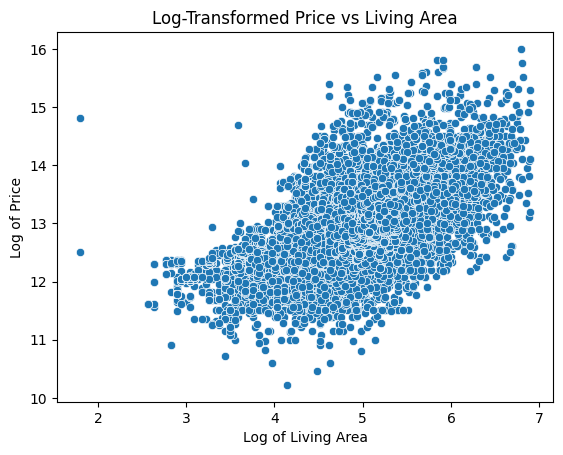

In [ ]:
# Exploring relationships between price and other features

# Using log transformation to compress large values

# x-axis for variable controlled
# y-axis for outcome or response

import numpy as np

dfc["log_price"] = np.log1p(dfc["price"])  # log1p handles log(0) safely
dfc["log_living_area"] = np.log1p(dfc["living_area"])

sns.scatterplot(x="log_living_area", y="log_price", data=dfc)
plt.xlabel("Log of Living Area")
plt.ylabel("Log of Price")
plt.title("Log-Transformed Price vs Living Area")
plt.show()


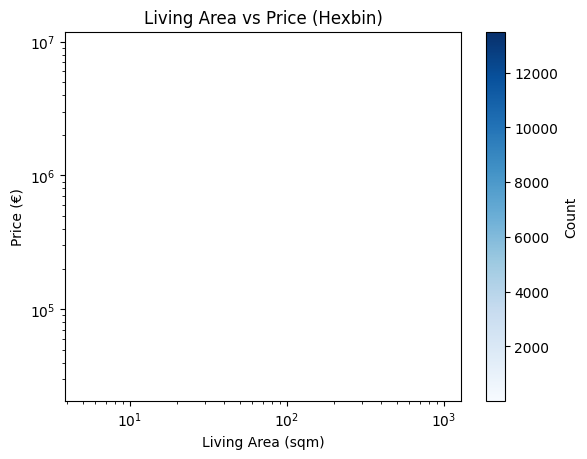

In [33]:
# Use a Hexbin Plot (for Density Visualization)

plt.hexbin(dfc["living_area"], dfc["price"], gridsize=10, cmap="Blues", mincnt=1)
plt.colorbar(label="Count")
plt.title("Living Area vs Price (Hexbin)")
plt.xlabel("Living Area (sqm)")
plt.ylabel("Price (€)")
plt.xscale("log")
plt.yscale("log")
plt.show()